In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import random
from factor_analyzer import FactorAnalyzer

In [2]:
movie = pd.read_csv(r"C:\Users\91983\Desktop\PGA\ml\movie review\movies data.csv")
ratings = pd.read_csv(r"C:\Users\91983\Desktop\PGA\ml\movie review\ratings data.csv")

In [3]:
print("ratings")
print(ratings.head())
print("------------------------------------------------------------------------------------")
print(ratings.info())
print("------------------------------------------------------------------------------------")
print("Movie")
print(movie.head())
print("------------------------------------------------------------------------------------")
print(movie.info())

ratings
   Unnamed: 0  UserID  MovieID  Rating  Timestamp
0           0       1     1193       5  978300760
1           1       1      661       3  978302109
2           2       1      914       3  978301968
3           3       1     3408       4  978300275
4           4       1     2355       5  978824291
------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   Unnamed: 0  1000209 non-null  int64
 1   UserID      1000209 non-null  int64
 2   MovieID     1000209 non-null  int64
 3   Rating      1000209 non-null  int64
 4   Timestamp   1000209 non-null  int64
dtypes: int64(5)
memory usage: 38.2 MB
None
------------------------------------------------------------------------------------
Movie
   Unnamed: 0  MovieID                               Title  \
0          

In [4]:
#dropping unnecessary columns
movie.drop("Unnamed: 0",axis=1,inplace=True)
ratings.drop(["Unnamed: 0","Timestamp"],axis=1,inplace=True)

In [5]:
print(movie.columns)
print(ratings.columns)

Index(['MovieID', 'Title', 'Genres'], dtype='object')
Index(['UserID', 'MovieID', 'Rating'], dtype='object')


In [6]:
len(ratings)

1000209

In [7]:
len(movie)

3883

In [8]:
#merging df
df = pd.merge(movie,ratings,how="outer",on="MovieID")

In [9]:
df = df.sample(10000)

In [10]:
len(df)

10000

In [11]:
df.head()

,MovieID,Title,Genres,UserID,Rating
879429,3317,Wonder Boys (2000),Comedy|Drama,5785.0,4.0
220648,912,Casablanca (1942),Drama|Romance|War,3792.0,5.0
223309,915,Sabrina (1954),Comedy|Romance,5501.0,3.0
613760,2275,Six-String Samurai (1998),Action|Adventure|Sci-Fi,1395.0,4.0
758367,2801,Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997),Drama|Romance,5502.0,4.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 879429 to 852886
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MovieID  10000 non-null  int64  
 1   Title    10000 non-null  object 
 2   Genres   10000 non-null  object 
 3   UserID   9999 non-null   float64
 4   Rating   9999 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.8+ KB


In [13]:
df.isnull().sum()

MovieID    0
Title      0
Genres     0
UserID     1
Rating     1
dtype: int64

In [14]:
len(df.Genres.value_counts())

284

In [15]:
df.Genres.value_counts()

Drama                                              1103
Comedy                                             1101
Comedy|Drama                                        441
Comedy|Romance                                      422
Drama|Romance                                       317
                                                   ... 
Children's|Comedy|Western                             1
Adventure|Children's|Drama|Romance                    1
Adventure|Animation|Children's|Comedy|Musical         1
Action|Animation|Children's|Sci-Fi|Thriller|War       1
Action|Adventure|Children's                           1
Name: Genres, Length: 284, dtype: int64

In [16]:
# Data Processing
# Converting Genres into different columns 
# Here we just create columns and put there initial value as 0
x = df.Genres
a = list()
for i in x:
    abc = i
    a.append(abc.split('|'))
a = pd.DataFrame(a)   
b = a[0].unique()
for i in b:
    df[i] = 0
df.head(2)

,MovieID,Title,Genres,UserID,Rating,Comedy,Drama,Action,Musical,Adventure,...,Film-Noir,Horror,Romance,Thriller,Mystery,Sci-Fi,Western,War,Documentary,Fantasy
879429,3317,Wonder Boys (2000),Comedy|Drama,5785.0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220648,912,Casablanca (1942),Drama|Romance|War,3792.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# we assign 1 to all the columns which are present in the Genres
for i in b:
    df.loc[df['Genres'].str.contains(i), i] = 1

In [18]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Comedy,Drama,Action,Musical,Adventure,...,Film-Noir,Horror,Romance,Thriller,Mystery,Sci-Fi,Western,War,Documentary,Fantasy
879429,3317,Wonder Boys (2000),Comedy|Drama,5785.0,4.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220648,912,Casablanca (1942),Drama|Romance|War,3792.0,5.0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
223309,915,Sabrina (1954),Comedy|Romance,5501.0,3.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
613760,2275,Six-String Samurai (1998),Action|Adventure|Sci-Fi,1395.0,4.0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
758367,2801,Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997),Drama|Romance,5502.0,4.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
df.drop(["Genres","Title"],axis =1,inplace=True)

In [20]:
df.head()

,MovieID,UserID,Rating,Comedy,Drama,Action,Musical,Adventure,Children's,Animation,...,Film-Noir,Horror,Romance,Thriller,Mystery,Sci-Fi,Western,War,Documentary,Fantasy
879429,3317,5785.0,4.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220648,912,3792.0,5.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
223309,915,5501.0,3.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
613760,2275,1395.0,4.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
758367,2801,5502.0,4.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
df.isnull().sum()

MovieID        0
UserID         1
Rating         1
Comedy         0
Drama          0
Action         0
Musical        0
Adventure      0
Children's     0
Animation      0
Crime          0
Film-Noir      0
Horror         0
Romance        0
Thriller       0
Mystery        0
Sci-Fi         0
Western        0
War            0
Documentary    0
Fantasy        0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
df.isnull().sum()

MovieID        0
UserID         0
Rating         0
Comedy         0
Drama          0
Action         0
Musical        0
Adventure      0
Children's     0
Animation      0
Crime          0
Film-Noir      0
Horror         0
Romance        0
Thriller       0
Mystery        0
Sci-Fi         0
Western        0
War            0
Documentary    0
Fantasy        0
dtype: int64

In [24]:
df.head()

,MovieID,UserID,Rating,Comedy,Drama,Action,Musical,Adventure,Children's,Animation,...,Film-Noir,Horror,Romance,Thriller,Mystery,Sci-Fi,Western,War,Documentary,Fantasy
879429,3317,5785.0,4.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220648,912,3792.0,5.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
223309,915,5501.0,3.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
613760,2275,1395.0,4.0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
758367,2801,5502.0,4.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
kmeans = KMeans(20)
kmeans.fit(df)

KMeans(n_clusters=20)

In [26]:
kmeans.inertia_

1909022978.1683273

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
inertia=[]
sil_score =[]
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(df)
    labels = kmeans.predict(df)
    iner_iter = kmeans.inertia_
    inertia.append(iner_iter)
    sil_score.append(silhouette_score(df,labels))

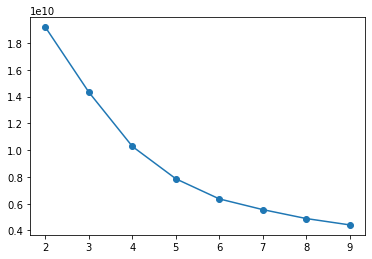

In [29]:
number_clusters = range(2,10)
plt.plot(number_clusters,inertia)
plt.scatter(number_clusters,inertia)

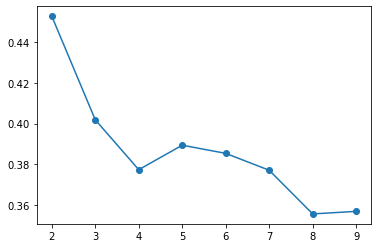

In [30]:
number_clusters = range(2,10)
plt.plot(number_clusters,sil_score)
plt.scatter(number_clusters,sil_score)

In [31]:
# so by elbow method by analyzing inertia and crosschecking sil score it is safe to say that our the optimum number of 
# clusters for this model is 5

In [32]:
kmeans = KMeans(5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [33]:
kmeans.labels_

array([2, 3, 0, ..., 0, 2, 2])

In [34]:
kmeans.fit_predict(df)

array([3, 1, 2, ..., 2, 3, 3])

In [35]:
df['Cluster'] = kmeans.labels_

In [36]:
df.head()

,MovieID,UserID,Rating,Comedy,Drama,Action,Musical,Adventure,Children's,Animation,...,Horror,Romance,Thriller,Mystery,Sci-Fi,Western,War,Documentary,Fantasy,Cluster
879429,3317,5785.0,4.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
220648,912,3792.0,5.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
223309,915,5501.0,3.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
613760,2275,1395.0,4.0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
758367,2801,5502.0,4.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3


In [37]:
df.Cluster.value_counts()

0    2197
3    2129
4    1975
1    1962
2    1736
Name: Cluster, dtype: int64

In [38]:
l1 = []
def arc(ra):
    a = pd.DataFrame(ra)
    b = pd.DataFrame(a['Cluster'].value_counts())
    d = a.index 
    c = [a['MovieID'][d[0]],int(b.idxmax())]
    l1.append(c)
df.groupby("MovieID").apply(lambda x: arc(x))

l1 = pd.DataFrame(l1)
l1.head()

,0,1
0,1,4
1,2,2
2,3,4
3,4,4
4,5,1


In [39]:
l1.rename(columns = {0:'MovieID',1:'Cluster'},inplace=True)

In [40]:
l1.Cluster.value_counts()

0    569
3    547
4    442
1    380
2    338
Name: Cluster, dtype: int64

In [41]:
l1

,MovieID,Cluster
0,1,4
1,2,2
2,3,4
3,4,4
4,5,1
...,...,...
2271,3946,0
2272,3948,0
2273,3949,0
2274,3950,0


In [42]:
l1.duplicated().sum()

0

In [43]:
l1.drop_duplicates(inplace=True)

In [44]:
movie1 = pd.read_csv(r"C:\Users\91983\Desktop\PGA\ml\movie review\movies data.csv")

In [45]:
new_data = pd.merge(l1 , movie1 , how='inner', on='MovieID')

In [46]:
new_data.isnull().sum()

MovieID       0
Cluster       0
Unnamed: 0    0
Title         0
Genres        0
dtype: int64

In [47]:
new_data

,MovieID,Cluster,Unnamed: 0,Title,Genres
0,1,4,0,Toy Story (1995),Animation|Children's|Comedy
1,2,2,1,Jumanji (1995),Adventure|Children's|Fantasy
2,3,4,2,Grumpier Old Men (1995),Comedy|Romance
3,4,4,3,Waiting to Exhale (1995),Comedy|Drama
4,5,1,4,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
2271,3946,0,3876,Get Carter (2000),Action|Drama|Thriller
2272,3948,0,3878,Meet the Parents (2000),Comedy
2273,3949,0,3879,Requiem for a Dream (2000),Drama
2274,3950,0,3880,Tigerland (2000),Drama


In [48]:
new_data.Cluster.value_counts()

0    569
3    547
4    442
1    380
2    338
Name: Cluster, dtype: int64

In [49]:
new_data.drop("Unnamed: 0",axis=1,inplace=True)

In [50]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2276 entries, 0 to 2275
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  2276 non-null   int64 
 1   Cluster  2276 non-null   int64 
 2   Title    2276 non-null   object
 3   Genres   2276 non-null   object
dtypes: int64(2), object(2)
memory usage: 88.9+ KB


In [51]:
#This function select the cluster for a user according the the user choice
def select_c():
    global l
    print('Select The Movies Id you would like to watch:')
    l=[]
    for i in range(10):
        l.append(random.randint(0,1819))
    for i in l:
        print(new_data['MovieID'][i] , new_data['Title'][i], new_data['Genres'][i],sep='--->')
    print('--------------------------------------------------------------------')
    l = int(input())
    l = new_data['Cluster'][new_data.MovieID == l]

In [52]:
# This is the main function which recommend you movies
def main():
    ans = False
    while not ans:
        select_c()
        print(new_data['Title'][new_data.Cluster == int(l)].sample(n=10))
        print('--------------------------------------------------------------------')
        print('Do you like these movies(y/n)')
        abc = input()
        while ((abc =='y') or (abc == 'Y')):          
            print(new_data['Title'][new_data.Cluster == int(l)].sample(n=10))
            print('--------------------------------------------------------------------')
            print('Want more!!!!(y/n)')
            abc = input()
            if ((abc =='N') or (abc == 'n')):
                ans =True

In [ ]:
main()

Select The Movies Id you would like to watch:
332--->Village of the Damned (1995)--->Horror|Sci-Fi
3028--->Taming of the Shrew, The (1967)--->Comedy
3004--->Bachelor, The (1999)--->Comedy|Romance
3005--->Bone Collector, The (1999)--->Thriller
932--->Affair to Remember, An (1957)--->Romance
532--->Serial Mom (1994)--->Comedy|Crime|Horror
2377--->Lifeforce (1985)--->Horror|Sci-Fi
2467--->Name of the Rose, The (1986)--->Mystery
1281--->Great Dictator, The (1940)--->Comedy
2531--->Battle for the Planet of the Apes (1973)--->Action|Sci-Fi
--------------------------------------------------------------------
332
234        Mrs. Parker and the Vicious Circle (1994)
1346    I Still Know What You Did Last Summer (1998)
177                                  Only You (1994)
748                     Raise the Red Lantern (1991)
248                   Low Down Dirty Shame, A (1994)
1150                      Black Cauldron, The (1985)
494                               Rear Window (1954)
1282            